In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data:

In [2]:
api_df = pd.read_excel("./BenchmarkUddinSO-ConsoliatedAspectSentiment.xls")
github_df = pd.read_csv("./github_gold.csv", delimiter=";")
stackoverflow_df = pd.read_csv("./StackOverflow.csv")

In [3]:
print("Number of instances in the API dataset:", api_df.shape[0])
print("Number of instances in the GitHub dataset:", github_df.shape[0])
print("Number of instances in the StackOverflow dataset:", stackoverflow_df.shape[0])

Number of instances in the API dataset: 4522
Number of instances in the GitHub dataset: 7122
Number of instances in the StackOverflow dataset: 1500


In [4]:
api_df.sample(5)

,thread,tid,sent,ManualLabel,codes,stakeholder,signal,intent,action
3607,309424,309424:100,"""It's awesome when your managers say ""Wow James!""",p,"[""'OnlySentiment'""]",NaN,NaN,NaN,NaN
1412,4991084,4991084:2,"""I have currently evaluating Java based securi...",p,"[""'Usability'""]",NaN,NaN,NaN,NaN
729,3775694,3775694:7,"""If you use URL_http://commons.apache.org/io [...",o,"[""'Usability'""]",NaN,NaN,NaN,NaN
2433,7358775,7358775:120,"""Let's have a look at the tutorial ... hm ... ...",o,"[""'Documentation'""]",NaN,NaN,NaN,NaN
3365,5536458,5536458:16,"""I suggest you generate your serialization (if...",p,"[""'Usability'""]",NaN,NaN,NaN,NaN


In [5]:
github_df.sample(5)

,ID,Polarity,Text
2247,45875,negative,"Jesus, another yak queuing up for being shaved..."
648,460327,neutral,"`Lets say the refreshrate is 24 hertz, and the..."
5102,393371,neutral,"nwsw is correct, there is an abstraction layer..."
5607,277877,neutral,"This is ok, you might want to use GHashTableIt..."
1214,455803,negative,just in time! will try it soon! thanks! starte...


In [6]:
stackoverflow_df.sample(5)

,id,text,oracle
614,2269,Its always fun when you have concurrent applic...,0
1323,6161,list of UIDefaults by @camickr.,0
380,1075,I was able to figure this out.,0
674,2580,( see: this answer ).,0
482,1646,"If it is 1 then updateBar will be called once,...",0


In [7]:
api_df.rename(columns={"thread": "id", "sent": "text", "ManualLabel": "label"}, inplace=True)
github_df.rename(columns={"ID": "id", "Text": "text", "Polarity": "label"}, inplace=True)
stackoverflow_df.rename(columns={"oracle": "label"}, inplace=True)

In [8]:
api_df["label"] = api_df["label"].replace({"n": 0, "o": 1, "p": 2}).astype(int)
github_df["label"] = github_df["label"].replace({"negative": 0, "neutral": 1, "positive": 2}).astype(int)
stackoverflow_df["label"] = stackoverflow_df["label"] + 1

C:\Users\Fabian Pena\AppData\Local\Temp\ipykernel_12800\3933453232.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  api_df["label"] = api_df["label"].replace({"n": 0, "o": 1, "p": 2}).astype(int)
C:\Users\Fabian Pena\AppData\Local\Temp\ipykernel_12800\3933453232.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  github_df["label"] = github_df["label"].replace({"negative": 0, "neutral": 1, "positive": 2}).astype(int)


### Clean the data:

In [9]:
print("Number of missing texts in the API dataset:", api_df["text"].isnull().sum())
print("Number of missing texts in the GitHub dataset:", github_df["text"].isnull().sum())
print("Number of missing texts in the StackOverflow dataset:", stackoverflow_df["text"].isnull().sum())

Number of missing texts in the API dataset: 0
Number of missing texts in the GitHub dataset: 0
Number of missing texts in the StackOverflow dataset: 0


In [10]:
print("Number of missing labels in the API dataset:", api_df["label"].isnull().sum())
print("Number of missing labels in the GitHub dataset:", github_df["label"].isnull().sum())
print("Number of missing labels in the StackOverflow dataset:", stackoverflow_df["label"].isnull().sum())

Number of missing labels in the API dataset: 0
Number of missing labels in the GitHub dataset: 0
Number of missing labels in the StackOverflow dataset: 0


In [11]:
print(f"Number of duplicated texts in the API dataset: {api_df["text"].duplicated().sum()} ({api_df["text"].duplicated().sum()/api_df.shape[0]:.2%})")
print(f"Number of duplicated texts in the GitHub dataset: {github_df["text"].duplicated().sum()} ({github_df["text"].duplicated().sum()/github_df.shape[0]:.2%})")
print(f"Number of duplicated texts in the StackOverflow dataset: {stackoverflow_df["text"].duplicated().sum()} ({stackoverflow_df["text"].duplicated().sum()/stackoverflow_df.shape[0]:.2%})")

Number of duplicated texts in the API dataset: 338 (7.47%)
Number of duplicated texts in the GitHub dataset: 0 (0.00%)
Number of duplicated texts in the StackOverflow dataset: 0 (0.00%)


*WARNING: Duplicated texts for the API dataset is particularly high.*

### Analyze distributions:

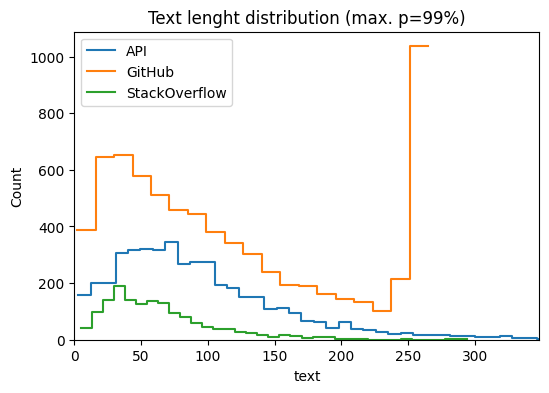

In [12]:
plt.figure(figsize=(6, 4))
sns.histplot(api_df["text"].str.len(), element="step", fill=False)
sns.histplot(github_df["text"].str.len(), element="step", fill=False)
sns.histplot(stackoverflow_df["text"].str.len(), element="step", fill=False)
plt.xlim([
    0,
    pd.concat([
        api_df["text"].str.len(),
        github_df["text"].str.len(),
        stackoverflow_df["text"].str.len(),
    ], axis=1, ignore_index=True).quantile(.99).max()
])
plt.legend(labels=["API", "GitHub", "StackOverflow"])
plt.title("Text lenght distribution (max. p=99%)")
plt.show()

In [14]:
label_stats = pd.concat([
    api_df["label"].value_counts(dropna=False, normalize=True),
    github_df["label"].value_counts(dropna=False, normalize=True),
    stackoverflow_df["label"].value_counts(dropna=False, normalize=True),
    pd.concat([api_df, github_df, stackoverflow_df])["label"].value_counts(dropna=False, normalize=True)
], axis=1)
label_stats.columns = ["API", "GitHub", "StackOverflow", "all"]
label_stats.round(2)

,API,GitHub,StackOverflow,all
label,,,,
1,0.58,0.42,0.79,0.52
2,0.23,0.28,0.09,0.24
0,0.19,0.29,0.12,0.24


*WARNING: Label proportions for the API dataset have important differences compared to [Zhang et al., 2020].*

### Persist datasets:

In [15]:
df = pd.concat([api_df, github_df, stackoverflow_df], ignore_index=True)

In [16]:
print(f"Number of duplicated texts in the entire dataset: {df["text"].duplicated().sum()} ({df["text"].duplicated().sum()/df.shape[0]:.2%})")

Number of duplicated texts in the entire dataset: 338 (2.57%)


In [17]:
df[["id", "text", "label"]].to_parquet("./sentiment.parquet", index=False)

In [18]:
print("Number of instances in the persisted dataset:", df.shape[0])

Number of instances in the persisted dataset: 13144
